In [3]:
import pandas as pd

df = pd.read_csv('2019.1 - Encuesta de remuneración salarial - Argentina.csv', skiprows=3)
df

,Me identifico,Tengo,Dónde estás trabajando,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,...,Orientación sexual,¿Tenés algún tipo de discapacidad?,¿Sentís que esto te dificultó el conseguir trabajo?,¿A qué eventos de tecnología asististe en el último año?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra
0,Hombre,22,Catamarca,2.0,1.0,1.0,0,Universitario,En curso,ING informática,...,Heterosexual,NaN,NaN,NaN,1001-2000,Producto basado en Software,8,9,2.0,Capacitaciones y/o cursos
1,Hombre,23,Catamarca,2.0,1.0,1.0,0,Secundario,Completado,Ing informática,...,Heterosexual,NaN,NaN,Charlas online,51-100,Producto basado en Software,8,10,2.0,"Capacitaciones y/o cursos, Licencia de paterni..."
2,Mujer,35,Chaco,8.0,7.0,2.0,2,Posgrado,En curso,MTI,...,dgsdg,NaN,No,varios,201-500,Otras industrias,4,4,0.2,"Capacitaciones y/o cursos, Licencia de paterni..."
3,Hombre,41,Chaco,20.0,2.0,10.0,0,Universitario,Completado,Lic en sistemas,...,Heterosexual,NaN,NaN,Ninguno,1-10,Servicios / Consultoría de Software / Digital,5,1,-1.0,"Horarios flexibles, Vacaciones flexibles (adic..."
4,Hombre,35,Chaco,5.0,3.0,2.0,0,Universitario,Completado,Analisis en Sistemas,...,Heterosexual,NaN,No,NaN,501-1000,Producto basado en Software,8,8,1.0,"Capacitaciones y/o cursos, Clases de idiomas, ..."
5,Hombre,38,Chaco,16.0,16.0,16.0,0,Terciario,Incompleto,Analista de Sistemas,...,Heterosexual,NaN,No,Ninguno,201-500,Otras industrias,6,4,2.0,Ninguna de las anteriores
6,Hombre,30,Chaco,9.0,5.0,5.0,3,Terciario,Completado,T S P,...,Heterosexual,NaN,No,NaN,201-500,Otras industrias,6,10,2.0,"Abono de celular y/o Internet, Comidas pagas/s..."
7,Hombre,32,Chaco,10.0,2.0,2.0,0,Universitario,Incompleto,Ing. en Sistemas,...,Heterosexual,NaN,NaN,Ninguno :(,1001-2000,Otras industrias,5,5,5.0,Ninguna de las anteriores
8,Hombre,28,Chaco,7.0,3.0,1.0,2,Universitario,Incompleto,Ingeniería en Sistemas,...,Heterosexual,NaN,No,NaN,51-100,Servicios / Consultoría de Software / Digital,10,5,-1.0,"Horarios flexibles, Vacaciones flexibles (adic..."
9,Hombre,29,Chaco,0.0,0.0,0.0,0,Universitario,En curso,Ingenieria en Sistemas,...,Heterosexual,NaN,No,NaN,501-1000,Producto basado en Software,5,5,3.0,Capacitaciones y/o cursos


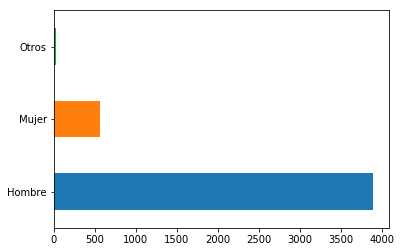

In [8]:
%matplotlib inline
df['Me identifico'].value_counts().plot.barh();

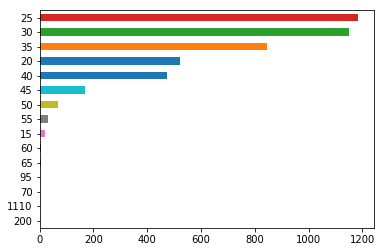

In [3]:
df['Tengo'].apply(lambda x: 5 * (x // 5)).value_counts(sort=True, ascending=True).plot.barh();

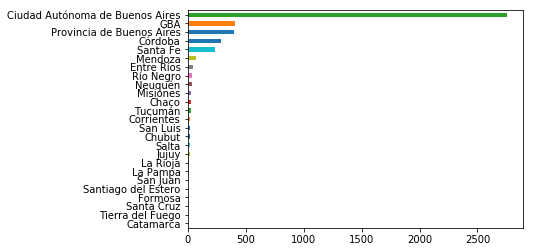

In [4]:
df['Dónde estás trabajando'].value_counts(sort=True, ascending=True).plot.barh();

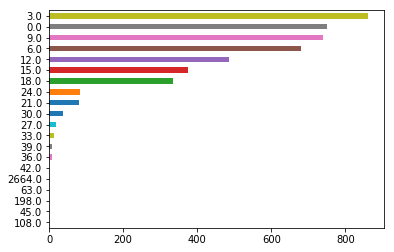

In [5]:
df['Años de experiencia'].apply(lambda x: 3 * (x // 3)).value_counts(sort=True, ascending=True).tail(20).plot.barh();

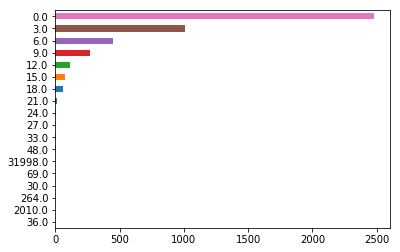

In [6]:
df['Años en la empresa actual'].apply(lambda x: 3 * (x // 3)).value_counts(sort=True, ascending=True).tail(20).plot.barh();

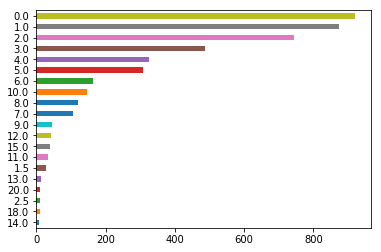

In [7]:
df['Años en el puesto actual'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

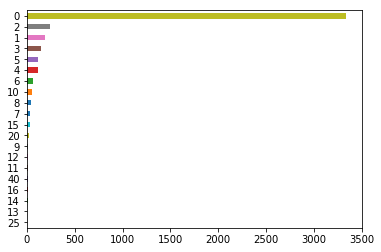

In [8]:
df['¿Gente a cargo?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

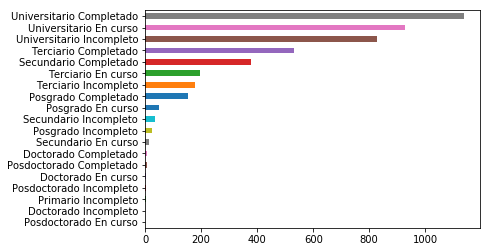

In [9]:
df.apply(lambda row: '{} {}'.format(row['Nivel de estudios alcanzado'], row['Estado']), axis=1).value_counts(sort=True, ascending=True).tail(20).plot.barh();

In [36]:
import re #ahre
regex_replace_map = {
    '^(Ing\.?|In?geni?[ea]r([íi]a|a|o))( en| de|) (.*)$': 'Ingeniería en \\4',
    '^(Ing\.?|Ingeni?er([íi]a|a|o|))$': 'Ingeniería',
    '^[LI]ic(enciatura|enciad[ao]|\.|)( en| de|) (.*)$': 'Licenciatura en \\3',
    '^Analistas?( de| en) (.*)$': 'Analista de \\2',
    '^(Tec\.? |T[eé]cnic(atura|a|o))(.*)$': 'Tecnicatura\\3',
    '^(Dr\.?|Doctor(ado|a|))( en| de|) (.*)$': 'Doctorado en \\4',
    '^Contador(a|).*$': 'Contador Público',
    '^Programador(a|).*$': 'Programación',
    '^(Abocac[íi]a|abogad[ao])$': 'Abogacía',
    '^(.*)ing[\. ](.+)$': '\\1Ingeniería \\2',
    '^(.*)lic[\. ](.+)$': '\\1Licenciatura \\2',
    '^(.*)(mg|mag|magister|maestr[íi]a)[\. ](.+)$': '\\1Maestría \\3',
    '^(.*)informaci[óo]n(.*)$': '\\1Información\\2',
    '^(.*)computaci[óo]n(.*)$': '\\1Computación\\2',
    '^(.*)inform[áàa]tica(.*)$': '\\1Informática\\2',
    '^(.*)programaci[óo]n(.*)$': '\\1Programación\\2',
    '^(.*)licenciatura(.*)$': '\\1Licenciatura\\2',
    '^(.*)electr[óo]nica(.*)$': '\\1Electrónica\\2',
    '^(.*)el[ée]ctrica(.*)$': '\\1Eléctrica\\2',
    '^(.*)tecnolog[íi]a(.*)$': '\\1Tecnología\\2',
    '^(.*)administraci[óo]n(.*)$': '\\1Administración\\2',
    '^(.*)sistem[as]s(.*)$': '\\1Sistemas\\2',
    '^(.*)ingeniero[as](.*)$': '\\1Ingeniería\\2',
    '^(.*)analista(.*)$': '\\1Analista\\2',
    '^(.*)(adm|admin)[ \.](.*)$': '\\1Administración \\2',
    '^(.*)inform[aá]ticos(.*)$': '\\1Informáticos\\2',
    '^(.*)liciencia(.*)$': '\\1licencia\\2', # OMG!
    '^(.*)ciencias?(.*)$': '\\1Ciencias\\2',
    '^(.*)cs\.?(.+)$': '\\1Ciencias\\2',
    '^(.*)an[áàa]lisis(.*)$': '\\1Análisis\\2',
    '^(.*)gesti[óo]n(.*)$': '\\1Gestión\\2',
    '^(.*)ux(.*)$': '\\1UX\\2',
    '^(.*)superior(.*)$': '\\1Superior\\2',
    '^(.*)rrhh(.*)$': '\\1Recursos Humanos\\2',
    '^(.*)empresa(.*)$': '\\1Empresa\\2',
    '^(.*)im[áa]gen(.*)$': '\\1Imágen\\2',
    '^(.*)sonido(.*)$': '\\1Sonido\\2',
    '^(.*)diseño(.*)$': '\\1Diseño\\2',
    '^(.*)electr[óo]nico(.*)$': '\\1Electrónico\\2',
    '^(.*)seguridad(.*)$': '\\1Seguridad\\2',
    '^(.*)higiene(.*)$': '\\1Higiene\\2',
    '^(.*)mec[áa]nica(.*)$': '\\1Mecánica\\2',
    '^(.*)telecomunicaciones(.*)$': '\\1Telecomunicaciones\\2',
    '^(.*)teleinform[áa]tica(.*)$': '\\1Teleinformática\\2',
    '^(.*)industrial(.*)$': '\\1Industrial\\2',
    '^(.*)universitari(.*)$': '\\1Universitari\\2',
    '^(.*)gr[áa]fico(.*)$': '\\1Gráfico\\2',
    '^(.*)desarrollo(.*)$': '\\1Desarrollo\\2',
    '^(.*)software(.*)$': '\\1Software\\2',
    '^(.*)social(.*)$': '\\1Social\\2',
    '^traductor(a|ado|)( P[úu]blico| de .+)?$': 'Traductorado Público',
    '^(.*)p[úu]blico(.*)$': '\\1Público\\2',
    '^(.*)trabajo(.*)$': '\\1Trabajo\\2',
    '^(.*)sitio(.*)$': '\\1Sitio\\2',
    '^(.*)filosof[íi]a(.*)$': '\\1Filosofía\\2',
    '^(.*)redes(.*)$': '\\1Redes\\2',
    '^(.*)psicolog[íi]a(.*)$': '\\1Psicología\\2',
    '^(.*)programador(.*)$': '\\1Programador\\2',
    '^(.*)biom[ée]dic(.*)$': '\\1Biomédic\\2',
    '^(.*)web(.*)$': '\\1Web\\2',
    '^(.*)arte(.*)$': '\\1Arte\\2',
    '^(.*)dela(.*)$': '\\1de la\\2',
    '^(.*)en en(.*)$': '\\1 en \\2',
    '^(.*) de (.*)$': '\\1 de \\2',
    '^(.*) en (.*)$': '\\1 en \\2',
    '^(.*)comunica(dor|dora|ci[óo]n)(.*)$': '\\1Comunicación\\3',
    '^(.*)telecomunicaci[óo]n(es)?(.*)$': '\\1Telecomunicaciones\\3',
    '^(.*)visual(.*)$': '\\1Visual\\2',
    '^fot[óo]graf(a|o|ia|ía)$': 'Fotografía',
    '^(.*)  (.*)$': '\\1 \\2',
    '^(TSP|T S P|T\.S\.P\.?)$': 'Tecnicatura Superior en Programación',
    '^(TSU|T S U|T\.S\.U\.?)(.*)$': 'Tecnicatura Superior Universitaria\\2',
    '^(ISI|I S I|I\.S\.I\.?)$': 'Ingeniería en Sistemas de Información',
    '^(.*)T\.? sup[\.](.*)$': '\\1Tecnicatura Superior\\2',
    '^(Tecnicatura|Ingeniería)( en | )(Industrial|Civil|Electrónic[ao]|Biom[ée]dica|Eléctrica|Mecánica)$': '\\1 \\3',
    '^(Tecnicatura|Ingeniería) Electrónic[ao]$': '\\1 Electrónica',
    '^(Ingeniería|Licenciatura) en Sistemas?(| de Información| en Información| de la Información| Inform[áa]ticos)$': '\\1 en Sistemas de Información',
    '^(.*)Superior Programación(.*)$': '\\1Superior en Programación\\2',
    '^(.*)Tecnicatura Universitario(.*)$': '\\1Tecnicatura Universitaria\\2',
    '^(.*)Tecnicaturaen(.*)$': '\\1Tecnicatura en\\2',
    '^(.*)TecnicaturaSuperior(.*)$': '\\1Tecnicatura Superior\\2',
    '^(.*)TecnicaturaProgramación(.*)$': '\\1Tecnicatura en Programación\\2',
    '^Tecnicatura Programador(.*)$': 'Tecnicatura en Programación',
    '^(LCC|Ciencias Computación|Licenciatura en Computación|Ciencias de la Computación)$': 'Licenciatura en Ciencias de la Computación',
    '^(An[áa]lisis de Sistemas?|Analista( de|) Sistemas?).*$': 'Analista de Sistemas',
    '^(Diseñ(o|ador|adora) Multimedial?|Multimedia)$': 'Diseño Multimedial',
    '^(.*)Universitario en Sistemas(.*)$': '\\1Universitario de Sistemas\\2',
    '^(.*)\.$': '\\1',
}
for regex, pattern in regex_replace_map.items():
    compiled_regex = re.compile(regex, re.I)
    df['Carrera'] = df['Carrera'].str.strip().str.replace(compiled_regex, pattern)

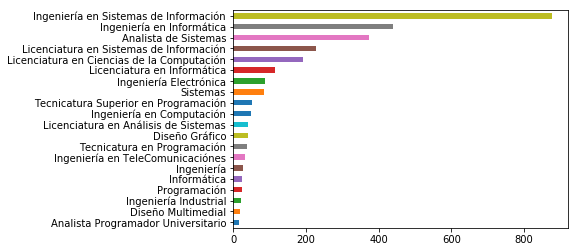

In [11]:
df['Carrera'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

In [41]:
regex_replace_map = {
    '(UTN|UTN .*|UTN ?F.*|Universidad Tec?nol[óo]gica Nacional( F.*)?)$': 'UTN',
    '(UBA|FIUBA|FCE-?UBA|Universidad de Buenos Aires|Buenos Aires)$': 'UBA',
    '(UNLP|Universidad Nacional de La Plata)$': 'UNLP',
    '(UNLaM|Universidad( Nacional|) de la Matanza|la matanza)$': 'UNLaM',
    '(UNS|Universidad Nacional del Sur)$': 'UNS',
    '(UNICEN|Universidad Nacional del Centro( de la (Provincia|Pcia\.?) de Buenos Aires)?)$': 'UNICEN',
    '(UNC|Universidad Nacional de C[óo]rdoba)$': 'UNC',
    '(UNRC|Universidad Nacional de R[ií]o Cuarto)$': 'UNRC',
    '(UNQ|Universidad Nacional de Quilmes|Unqui)$': 'UNQ',
    '(UADE|Universidad Argentina de la Empresa)$': 'UADE',
    '(UB|Universidad de Belgrano)$': 'UB',
    '(UK|(Universidad )?Kennedy)$': 'UK',
    '(UCES|Universidad de Ciencias Empresariales y Sociales)$': 'UCES',
    '(UM|Universidad de Mor[óo]n|Mor[óo]n)$': 'UM',
    '(UP|Universidad de Palermo|Palermo)$': 'UP',
    '(CAECE|UCAECE|Universidad CAECE)$': 'CAECE',
    '(ORT|ORT Argentina)$': 'ORT',
    '(UAI|(Universidad )?Abierta Interamericana)$': 'UAI',
    '(UBP|(Universidad )?Blas Pascal)$': 'UBP',
    '(Universidad )?(Maim[óo]nides)$': 'Maimónides',
    '(UNLA|.*Lan[úu]s)$': 'UNLA',
    '(UNL|(Universidad )?Nacional del Litoral)$': 'UNL',
    '(UNLu|Universidad Nacional de Luj[áa]n)$': 'UNLu',
    '((Escuela .?)?(Multimedial? )?)?Da ?Vinci$': 'DaVinci',
    '(Universidad )?(Siglo 21|Siglo XXI)$': 'Siglo 21',
    '(UA|(Universidad )?Austral)$': 'UNL',
    '(UA|(Universidad )?Austral)$': 'UNL',
    '(Istea)$': 'ISTEA',
    '(UAP|Universidad Adventista del Plata)': 'UAP',
    '(UNJu|Universidad Nacional de Jujuy)': 'UNJu',
    '(UNCUYO|Universidad Nacional de Cuyo)': 'UNCUYO',
    '(ISSD|Instituto Superior Santo Domingo)': 'ISSD',
    '(UNSAM|Universidad Nacional de San Mart[ií]n)': 'UNSAM',
    '(UNLAR|Universidad Nacional de La Rioja)': 'UNLaR',
    '(UNCOMA|Universidad Nacional del Comahue)': 'UNCOMA',
    '(UDA|Universidad del Aconcagua)': 'UDA',
    '(IUA|Instituto Universitario Aeronautico)': 'IUA',
    '(-)$': 'DELETEME',
}
for regex, pattern in regex_replace_map.items():
    compiled_regex = re.compile(regex, re.I)
    df['Universidad'] = df['Universidad'].str.strip().str.replace(compiled_regex, pattern)

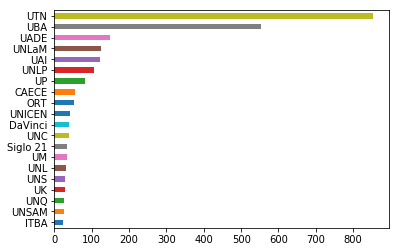

In [13]:
df['Universidad'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

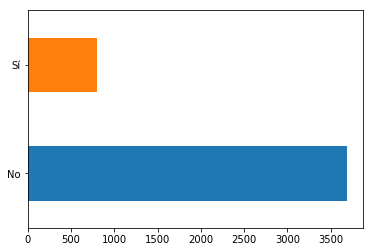

In [14]:
df['¿Contribuís a proyectos open source?'].value_counts().plot.barh();

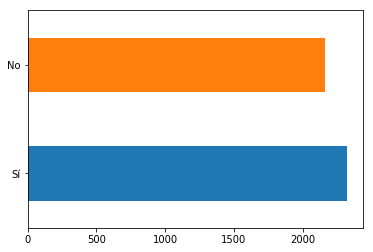

In [15]:
df['¿Programás como hobbie?'].value_counts().plot.barh();

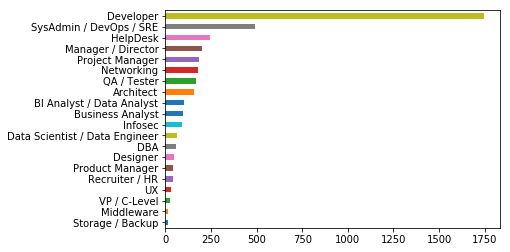

In [16]:
df['Trabajo de'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

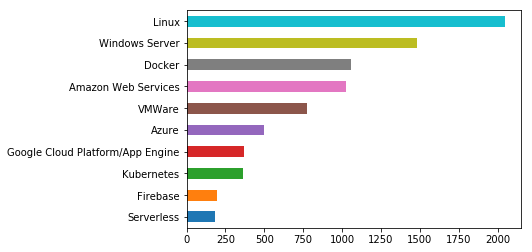

In [67]:
tech_count = {}
for x in df['Plataformas'].dropna():
    for key in x.split(','):
        key = key.strip()
        tech_count[key] = tech_count.get(key, 0) + 1
pd.Series(tech_count).sort_values(ascending=True).tail(10).plot.barh();

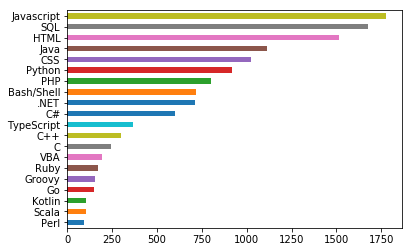

In [18]:
languages_count = {}
for x in df['Lenguajes de programación'].dropna():
    for key in x.split(','):
        key = key.strip()
        languages_count[key] = languages_count.get(key, 0) + 1
pd.Series(languages_count).sort_values(ascending=True).tail(20).plot.barh();

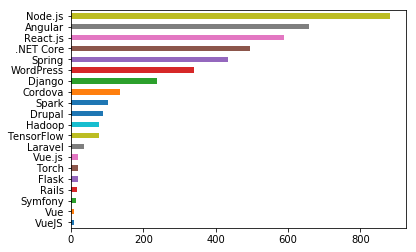

In [92]:
fw_count = {}
for x in df['Frameworks, herramientas y librerías'].dropna():
    for key in x.split(','):
        key = key.strip()
        fw_count[key] = fw_count.get(key, 0) + 1
pd.Series(fw_count).sort_values(ascending=True).tail(20).plot.barh();

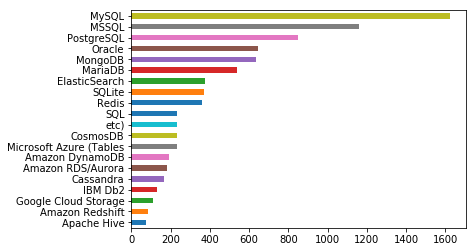

In [100]:
db_count = {}
for x in df['Bases de datos'].dropna():
    for key in x.split(','):
        key = key.strip()
        db_count[key] = db_count.get(key, 0) + 1
pd.Series(db_count).sort_values(ascending=True).tail(20).plot.barh();

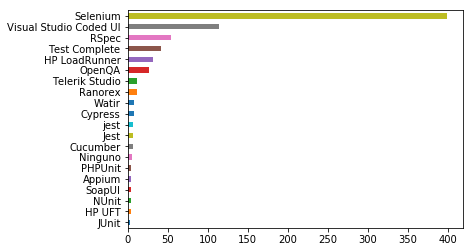

In [108]:
qat_count = {}
for x in df['QA / Testing'].dropna():
    for key in x.split(','):
        key = key.strip()
        qat_count[key] = qat_count.get(key, 0) + 1
pd.Series(qat_count).sort_values(ascending=True).tail(20).plot.barh();

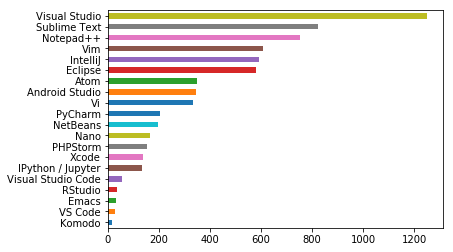

In [113]:
ide_count = {}
for x in df['IDEs'].dropna():
    for key in x.split(','):
        key = key.strip()
        ide_count[key] = ide_count.get(key, 0) + 1
pd.Series(ide_count).sort_values(ascending=True).tail(20).plot.barh();

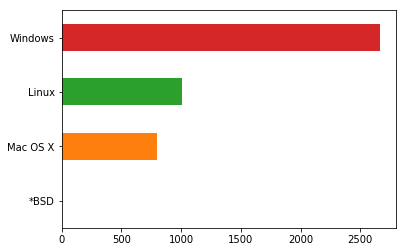

In [23]:
df['¿Qué SO usás en tu laptop/PC para trabajar?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

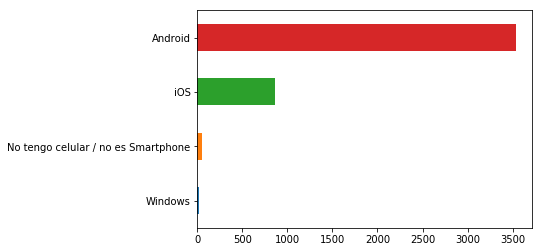

In [24]:
df['¿Y en tu celular?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

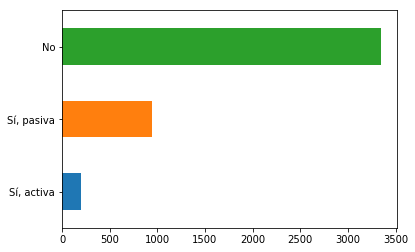

In [25]:
df['¿Tenés guardias?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

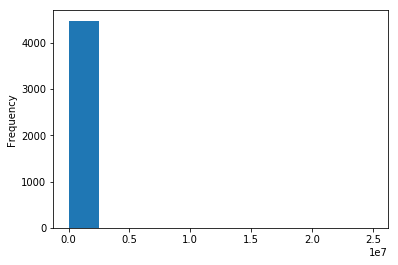

In [26]:
df['Salario mensual BRUTO (en tu moneda local)'].plot.hist();

In [27]:
df['Salario mensual BRUTO (en tu moneda local)'].sort_values().head()

1906    1.0
2124    1.0
43      1.0
2235    1.0
3916    1.0
Name: Salario mensual BRUTO (en tu moneda local), dtype: float64

In [28]:
df['Salario mensual BRUTO (en tu moneda local)'].sort_values().tail()

3274      931415.92
4029     1500000.00
2349     3572000.00
3169     5138262.00
3919    25000000.00
Name: Salario mensual BRUTO (en tu moneda local), dtype: float64

In [29]:
(df['Salario mensual BRUTO (en tu moneda local)'] < 10000).sum()

151

In [30]:
df[(df['Salario mensual BRUTO (en tu moneda local)'] < 12000) & (df['Salario mensual BRUTO (en tu moneda local)'] > 10000)]

,Me identifico,Tengo,Dónde estás trabajando,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,...,Orientación sexual,¿Tenés algún tipo de discapacidad?,¿Sentís que esto te dificultó el conseguir trabajo?,¿A qué eventos de tecnología asististe en el último año?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra
662,Mujer,20,Ciudad Autónoma de Buenos Aires,0.0,0.0,0.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,...,Heterosexual,NaN,NaN,NaN,201-500,Servicios / Consultoría de Software / Digital,7,9,5.0,"Capacitaciones y/o cursos, Descuentos varios (..."
1075,Mujer,25,Ciudad Autónoma de Buenos Aires,0.0,0.0,0.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,...,Heterosexual,NaN,NaN,Digital Summit 2018,1001-2000,Servicios / Consultoría de Software / Digital,8,9,9.0,"Capacitaciones y/o cursos, Descuentos varios (..."
1261,Mujer,21,Ciudad Autónoma de Buenos Aires,1.0,1.0,1.0,0,Universitario,En curso,Diseño Gráfico,...,Bisexual o queer,NaN,NaN,NaN,1-10,Producto basado en Software,8,1,8.0,"Horarios flexibles, Vacaciones flexibles (adic..."
1976,Hombre,26,Ciudad Autónoma de Buenos Aires,0.0,0.0,0.0,0,Terciario,Completado,Diseño Multimedial,...,Pansexual,NaN,No,NaN,1-10,Servicios / Consultoría de Software / Digital,5,5,5.0,Comidas pagas/subvencionadas
2393,Hombre,71,Ciudad Autónoma de Buenos Aires,20.0,3.0,20.0,0,Universitario,Incompleto,Ingeniería,...,Heterosexual,NaN,No,0,11-50,Otras industrias,2,2,5.0,Ninguna de las anteriores
2798,Hombre,22,Córdoba,1.0,1.0,1.0,0,Universitario,En curso,Ingeniería en Software,...,Heterosexual,NaN,NaN,PyData Córdoba,201-500,Otras industrias,6,7,9.6,"Capacitaciones y/o cursos, Descuentos varios (..."
2804,Hombre,20,Córdoba,1.0,1.0,1.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,...,Heterosexual,NaN,NaN,Facebook Developers Circle CBA,11-50,Otras industrias,7,8,8.0,"Capacitaciones y/o cursos, Playroom"
2949,Hombre,38,Córdoba,5.0,5.0,5.0,0,Universitario,En curso,Ingeniería en TeleComunicaciónes,...,Heterosexual,NaN,NaN,NaN,51-100,Otras industrias,8,9,4.0,"Capacitaciones y/o cursos, Horarios flexibles"
3124,Hombre,32,Entre Ríos,5.0,4.0,4.0,2,Universitario,En curso,Licenciatura en Sistemas de Información,...,Heterosexual,NaN,No,Conferencias de Seguridad Informática,1-10,Producto basado en Software,6,6,12.0,Ninguna de las anteriores
3890,Hombre,28,Provincia de Buenos Aires,1.0,1.0,1.0,0,Universitario,Completado,Tecnicatura Superior en Programación,...,Heterosexual,NaN,NaN,NaN,1-10,Producto basado en Software,10,10,3.0,"Horarios flexibles, Vacaciones flexibles (adic..."


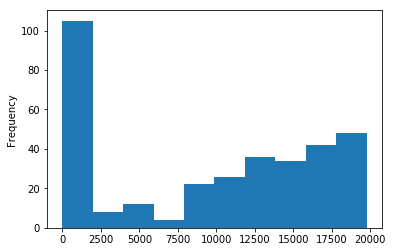

In [31]:
df[(df['Salario mensual BRUTO (en tu moneda local)'] < 20000)]['Salario mensual BRUTO (en tu moneda local)'].plot.hist();

In [32]:
df['Salario mensual BRUTO (en tu moneda local)'].sort_values().tail(20)

59        330000.00
58        332200.00
409       340000.00
3694      356783.00
299       370000.00
500       370000.00
3192      370000.00
591       440000.00
2109      450000.00
3489      550000.00
4129      576000.00
746       600000.00
1274      600000.00
2387      630000.00
2489      720000.00
3274      931415.92
4029     1500000.00
2349     3572000.00
3169     5138262.00
3919    25000000.00
Name: Salario mensual BRUTO (en tu moneda local), dtype: float64

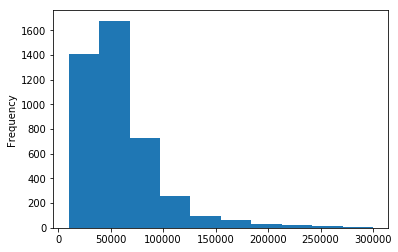

In [33]:
df[(df['Salario mensual BRUTO (en tu moneda local)'] >= 10000) & (df['Salario mensual BRUTO (en tu moneda local)'] <= 300000)]['Salario mensual BRUTO (en tu moneda local)'].plot.hist();

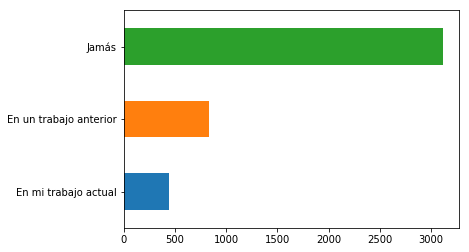

In [34]:
df['¿Sufriste o presenciaste situaciones de violencia laboral?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

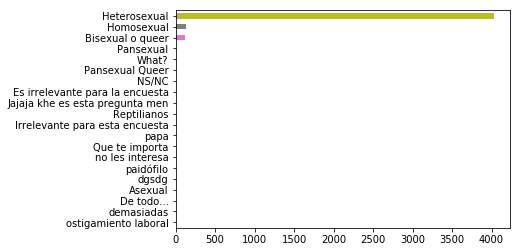

In [35]:
df['Orientación sexual'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

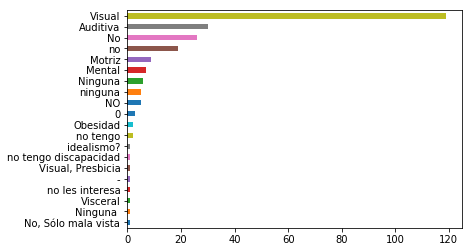

In [128]:
df['¿Tenés algún tipo de discapacidad?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

'reduced in 0.000000'

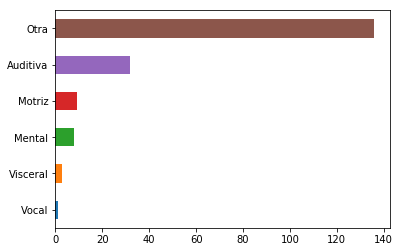

In [131]:
def normalize_dataframe_column(df_in, column_name, regex_assign_map):
  """
  Given a Dataframe (df), a column name that identifies the column to sanitize,
  applies an in-place replacement for each pair regex-value in the map
  """
  df_out = df_in.copy()
  for regex, value in regex_assign_map.items():
    compiled_regex = re.compile(regex, re.I)
    mask = df_in[ column_name ].str.strip().str.match(compiled_regex, na=False)
    df_out.loc[ mask, column_name ] = value
  
  # debug
  total, final = len(df_in[column_name].unique()), len(df_out[column_name].unique())
  display('reduced in {:02f}'.format((total - final) / total))
  return df_out

def normalize_dataframe_column_replace(df_in, column_name, regex_replace_map):
  """
  Given a Dataframe (df), a column name that identifies the column to sanitize,
  applies an in-place replacement for each pair regex-value in the map
  """
  df_out = df_in.copy()
  for regex, pattern in regex_replace_map.items():
    compiled_regex = re.compile(regex, re.I)
    df_out[ column_name ] = df_out[ column_name ].str.strip().str.replace(compiled_regex, pattern)
  
  # debug
  total, final = len(df_in[column_name].unique()), len(df_out[column_name].unique())
  display('reduced in {:02f}'.format((total - final) / total))
  return df_out

df = normalize_dataframe_column(df, '¿Tenés algún tipo de discapacidad?', {
    '^(_|-|no( tengo)?|ningun[oa]|nada|0|)$': None,
    '.*auditiv[oa].*': 'Auditiva',
    '.*visual.*': 'Visual',
    'mental': 'Mental',
    'motriz': 'Motriz',
    'vis?c?eral': 'Visceral',
    '^no, solo mala vista$': None,
    '^no tengo ninguna discapacidad$': None,
    '^tolerancia$': None,
    '^no tengo discapacidad$': None,
    r'^en serio\?$': None,
    r'^idealismo\?$': None,
    r'^si soy lagarto$': None,
    r'^windows$': None,
    r'^social$': None,
    r'^no les interesa$': None,
    r'^edad$': None,
    r'^ninguna \¿Habia que llenar esta respuesta\?$': None,
})
df['¿Tenés algún tipo de discapacidad?'] = df['¿Tenés algún tipo de discapacidad?'].apply(lambda val: val if val in (None, 'Auditiva', 'Mental', 'Motriz', 'Vocal', 'Visceral') or not isinstance(val, str) else 'Otra')
df['¿Tenés algún tipo de discapacidad?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

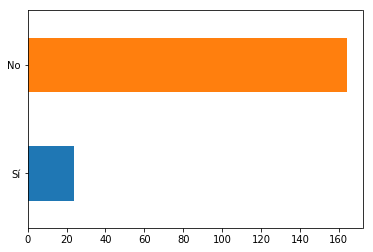

In [130]:
df[~df['¿Tenés algún tipo de discapacidad?'].isna()]['¿Sentís que esto te dificultó el conseguir trabajo?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

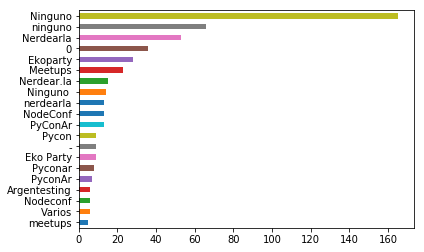

In [40]:
df['¿A qué eventos de tecnología asististe en el último año?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

'reduced in 0.000000'

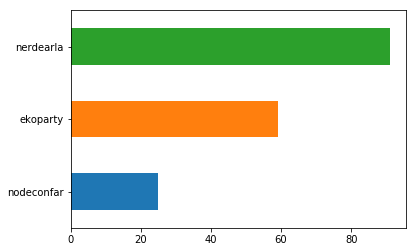

In [47]:
df = normalize_dataframe_column(df, '¿A qué eventos de tecnología asististe en el último año?', {
    '^nerdear\.?la$': 'nerdearla',
    '^eko ?partys?$': 'ekoparty',
    '^pycon(?:ar)?$': 'pyconar',
    '^nodeconf(?:ar)?$': 'nodeconfar',
})

df['¿A qué eventos de tecnología asististe en el último año?'] = df['¿A qué eventos de tecnología asististe en el último año?'].apply(lambda val: val if val in (None, 'nerdearla', 'ekoparty', 'nodeconfar',) or not isinstance(val, str) else None)
df['¿A qué eventos de tecnología asististe en el último año?'].value_counts(sort=True, ascending=True).tail(20).plot.barh();

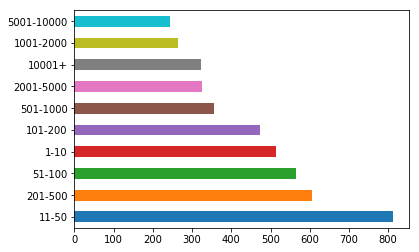

In [49]:
df['Cantidad de empleados'].value_counts().plot.barh();

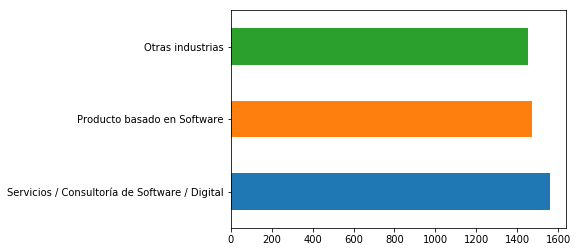

In [50]:
df['Actividad principal'].value_counts().plot.barh();

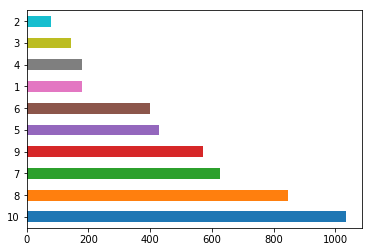

In [51]:
df['¿Cómo calificás las políticas de diversidad e inclusión?'].value_counts().plot.barh();

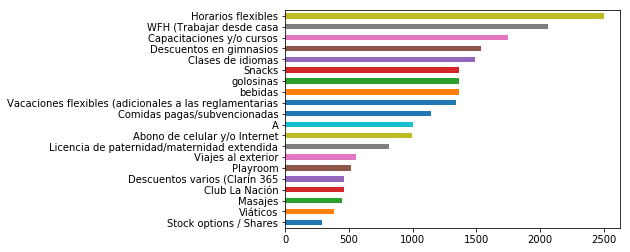

In [7]:
all_benefits = ','.join(df['Beneficios extra'].tolist())
benefits = set(x for x in [item.strip('.,-)()').strip() for s in df['Beneficios extra'].tolist() for item in s.split(',')] if x not in ('', 'a', 'no', 'nada', 'Ninguna', 'etc', 'Ninguna de las anteriores'))
pd.Series({b: all_benefits.count(b) for b in benefits}).sort_values(ascending=True).tail(20).plot.barh();

In [12]:
df = df[df['Años de experiencia'] < 40]
df = df[df['Tengo'] < 80]
df = df[df['Años en la empresa actual'] < 40]
df = df[(df['Salario mensual BRUTO (en tu moneda local)'] >= 10000) & (df['Salario mensual BRUTO (en tu moneda local)'] <= 300000)]

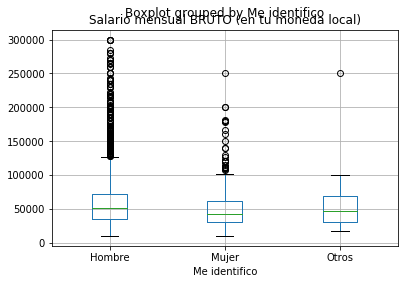

In [14]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', 'Me identifico');

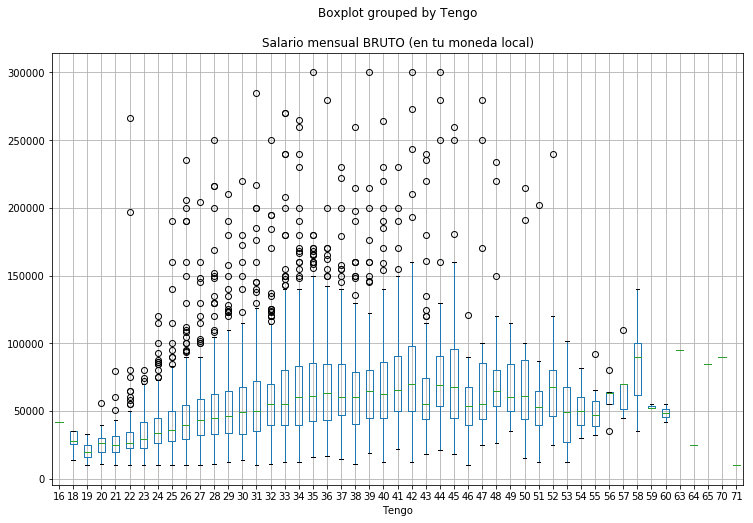

In [19]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', 'Tengo', figsize=(12, 8));

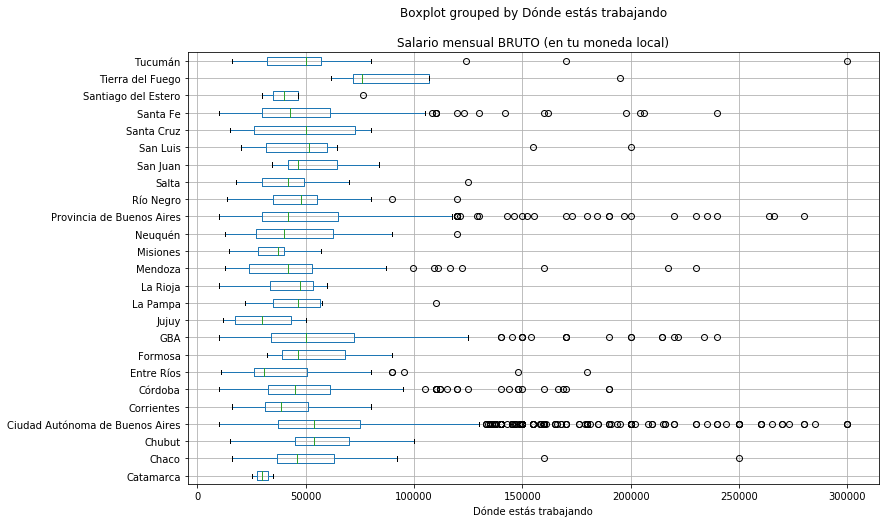

In [24]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', 'Dónde estás trabajando', figsize=(12, 8), vert=False);

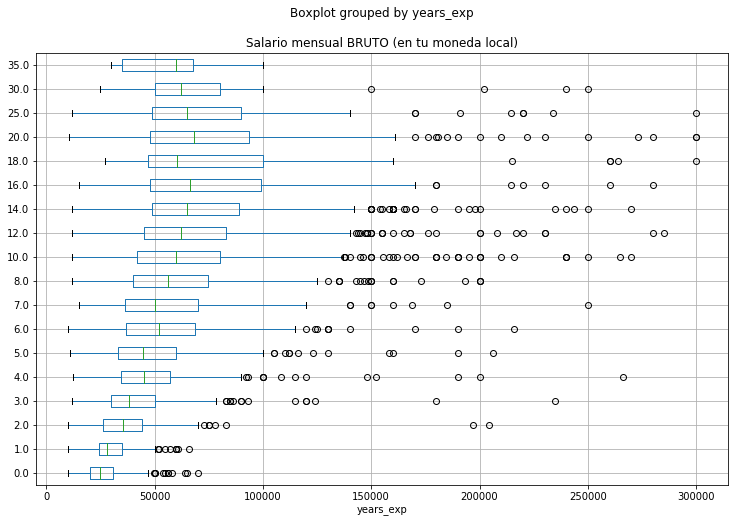

In [28]:
def years_exp(y):
    if y < 8: return int(y)
    if y < 20: return 2 * (y // 2) # 6->6, 7->6, 8->8, 9->8
    return (y // 5) * 5
    
df['years_exp'] = df['Años de experiencia'].apply(years_exp)# .value_counts(sort=True, ascending=True).tail(20).plot.barh();
df.boxplot('Salario mensual BRUTO (en tu moneda local)', 'years_exp', figsize=(12, 8), vert=False);

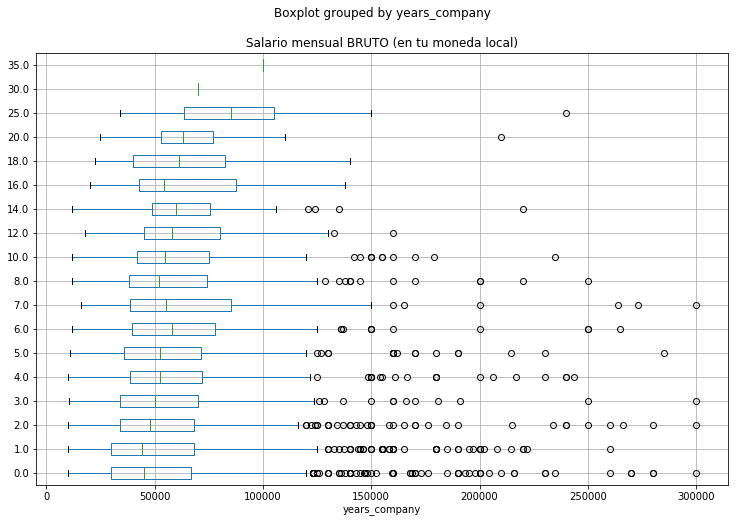

In [29]:
df['years_company'] = df['Años en la empresa actual'].apply(years_exp)
df.boxplot('Salario mensual BRUTO (en tu moneda local)', 'years_company', figsize=(12, 8), vert=False);

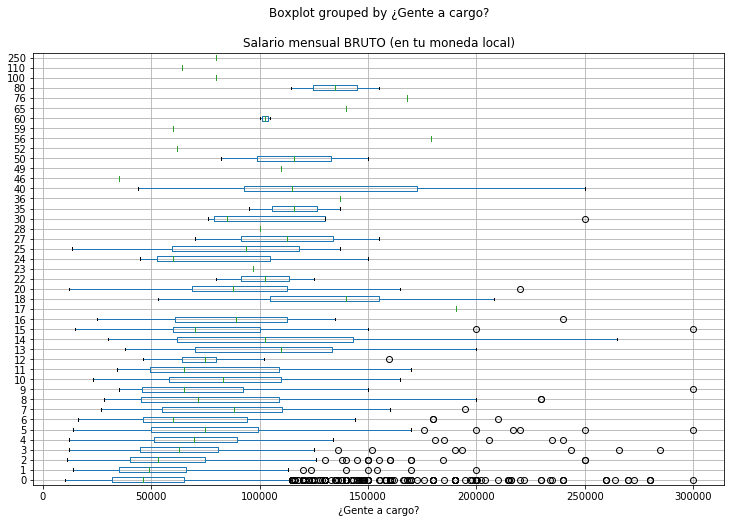

In [30]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', '¿Gente a cargo?', figsize=(12, 8), vert=False);

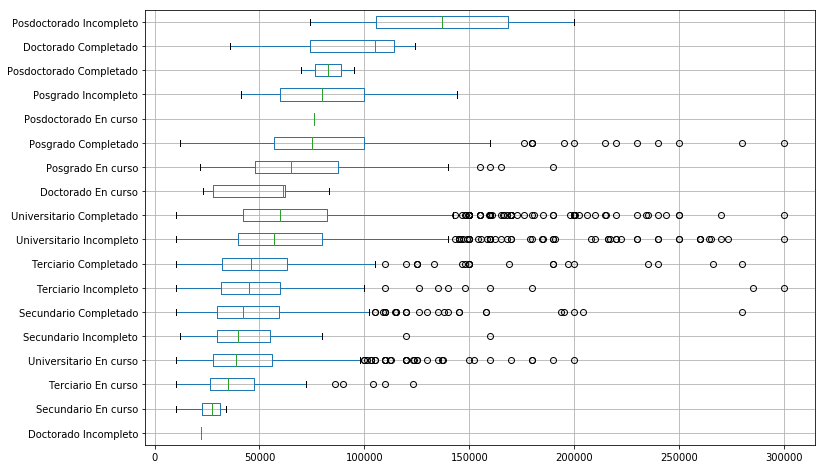

In [32]:
def boxplot_sorted(df, by, column):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    df2[meds.index].boxplot(figsize=(12, 8), vert=False)

df['studied'] = df.apply(lambda row: '{} {}'.format(row['Nivel de estudios alcanzado'], row['Estado']), axis=1)

boxplot_sorted(df, by=["studied"], column="Salario mensual BRUTO (en tu moneda local)")

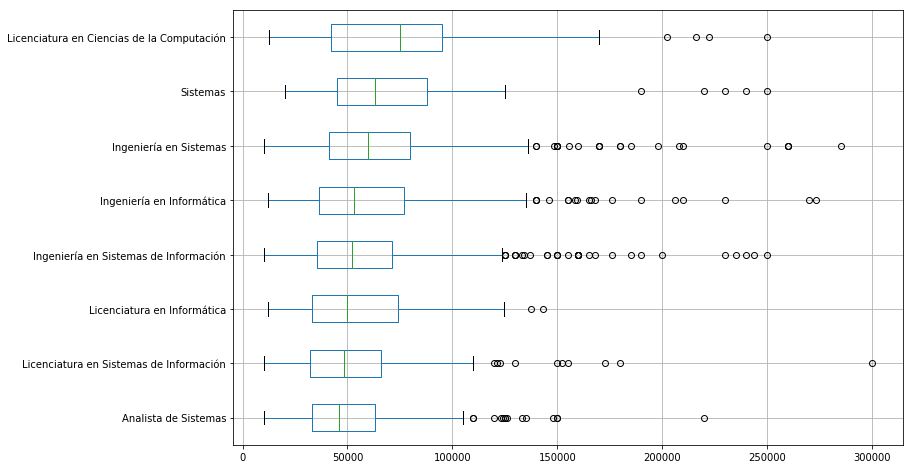

In [40]:
df['Carrera'].value_counts(sort=True, ascending=True).tail(20)#.plot.barh();
valid_carrera = 'Sistemas','Licenciatura en Informática','Licenciatura en Sistemas de Información','Licenciatura en Ciencias de la Computación','Ingeniería en Sistemas','Analista de Sistemas','Ingeniería en Informática','Ingeniería en Sistemas de Información'
boxplot_sorted(df[df['Carrera'].apply(lambda c: c in valid_carrera)], by=["Carrera"], column="Salario mensual BRUTO (en tu moneda local)")

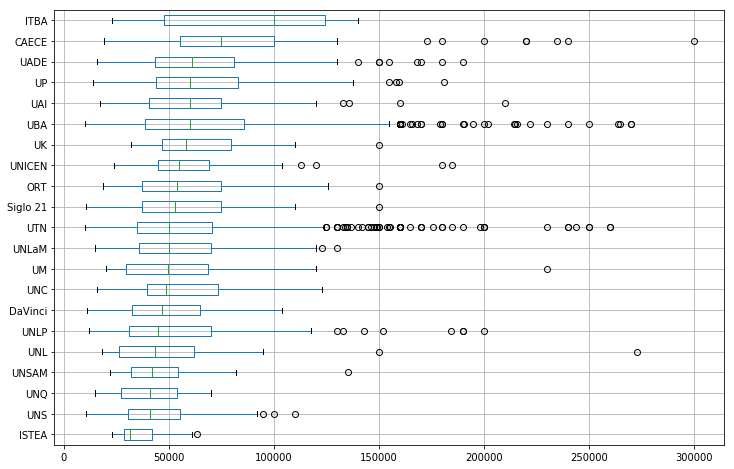

In [48]:
vc = df['Universidad'].value_counts()
univs = vc[vc > 20].index.tolist()
boxplot_sorted(df[df['Universidad'].apply(lambda c: c in univs)], by=["Universidad"], column="Salario mensual BRUTO (en tu moneda local)")

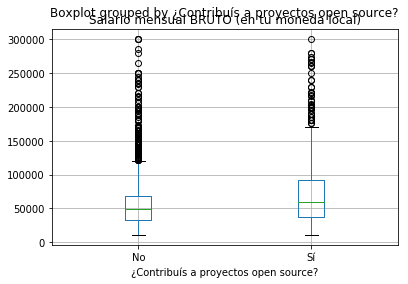

In [51]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', '¿Contribuís a proyectos open source?');

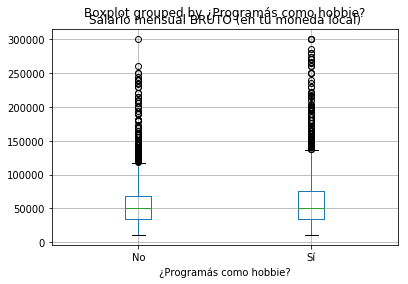

In [52]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', '¿Programás como hobbie?');

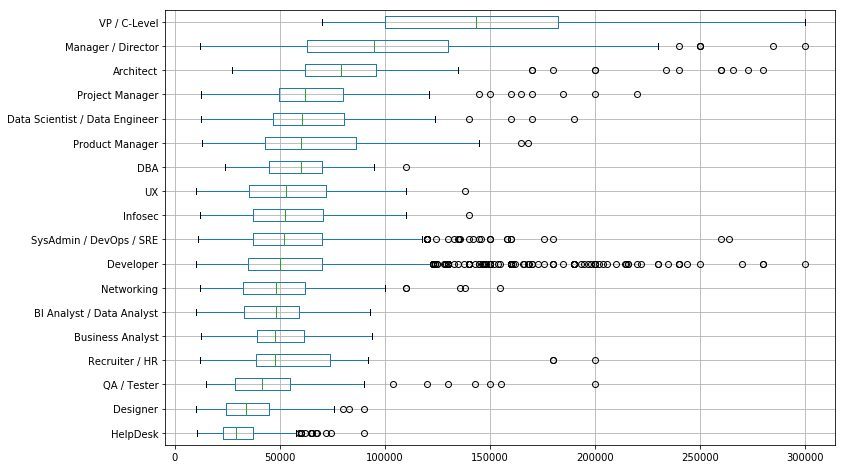

In [54]:
vc = df['Trabajo de'].value_counts()
univs = vc[vc > 20].index.tolist()
boxplot_sorted(df[df['Trabajo de'].apply(lambda c: c in univs)], by=["Trabajo de"], column="Salario mensual BRUTO (en tu moneda local)")

In [69]:
tech_counts = pd.Series(tech_count).sort_values(ascending=True)
tech_counts = tech_counts[tech_counts > 20]
tech_counts

SAP                                   28
HP-UX                                 66
*BSD                                  88
Mainframe                             90
IBM Cloud / Watson                   100
Solaris                              107
Heroku                               116
AIX                                  116
OpenStack                            132
Serverless                           182
Firebase                             198
Kubernetes                           363
Google Cloud Platform/App Engine     369
Azure                                497
VMWare                               774
Amazon Web Services                 1024
Docker                              1056
Windows Server                      1485
Linux                               2051
dtype: int64

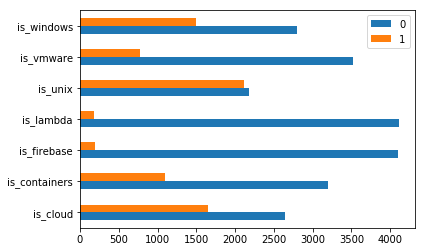

In [72]:
d = {}
for key, tech in {
        'unix': ('Linux', '*BSD', 'AIX', 'OpenStack', 'Solaris', 'HP-UX'),
        'windows': ('Windows', 'Windows Server'),
        'vmware': ('VMWare',),
        'containers': ('Docker', 'Kubernetes'),
        'cloud': ('Azure', 'Amazon Web Services', 'Google Cloud Platform/App Engine', 'OpenStack', 'Heroku', 'IBM Cloud / Watson',),
        'firebase': ('Firebase',),
        'lambda': ('Serverless',),
    }.items():
    d['is_{}'.format(key)] = df['Plataformas'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['Plataformas'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
pd.DataFrame({x: v.value_counts() for x, v in d.items()}).T.plot.barh();

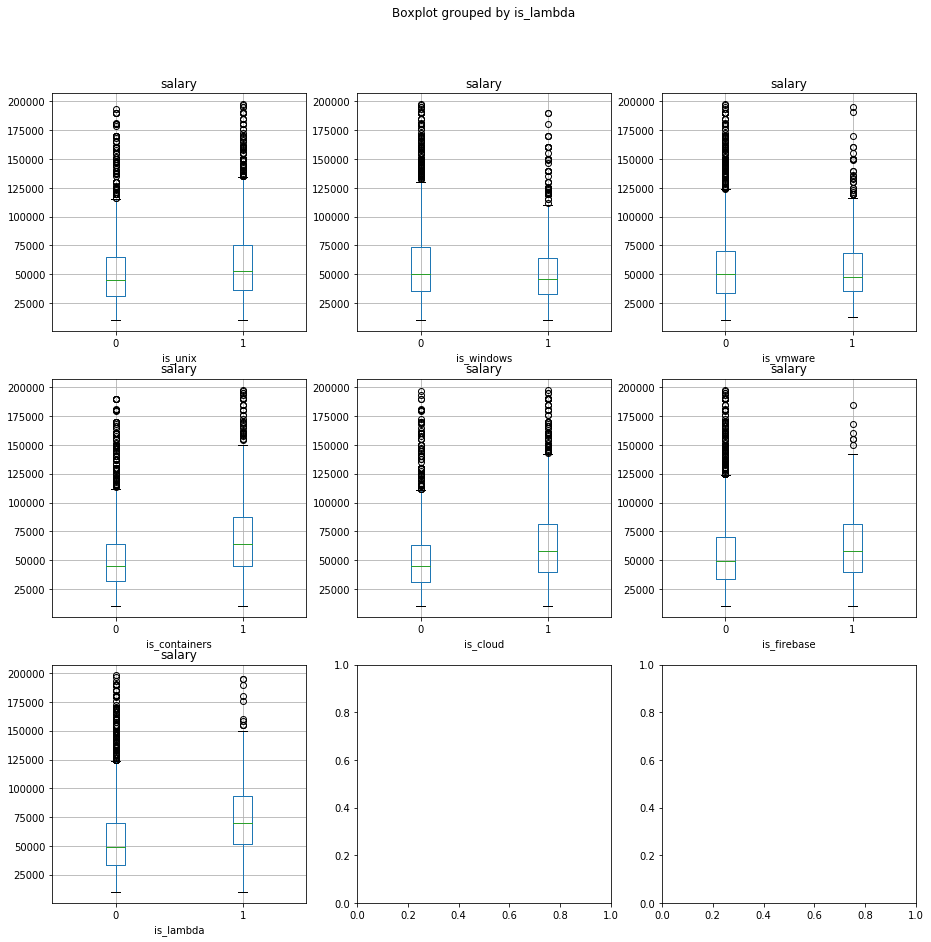

In [88]:
import matplotlib.pyplot as plt
_, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, _, _)) = plt.subplots(3, 3, figsize=(15, 15))
df['salary'] = df['Salario mensual BRUTO (en tu moneda local)']
df_low = df[df['Salario mensual BRUTO (en tu moneda local)'] < 200000]
df_low.boxplot('salary', 'is_unix', ax=ax1);
df_low.boxplot('salary', 'is_windows', ax=ax2);
df_low.boxplot('salary', 'is_vmware', ax=ax3);
df_low.boxplot('salary', 'is_containers', ax=ax4);
df_low.boxplot('salary', 'is_cloud', ax=ax5);
df_low.boxplot('salary', 'is_firebase', ax=ax6);
df_low.boxplot('salary', 'is_lambda', ax=ax7);

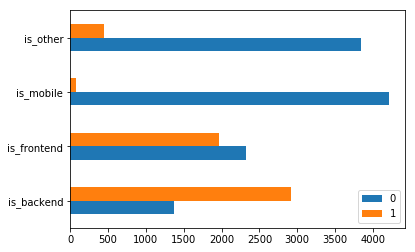

In [89]:
d = {}
for key, tech in {
        'frontend': ('Javascript', 'HTML', 'CSS', 'jQuery'),
        'backend': ('Java', 'PHP', 'Python', '.NET', 'NodeJS', 'C#', 'Ruby', 'Perl', 'Go', 'Scala'),
        'other': ('VB*', 'C++', 'C,', 'ABAP'),
        'mobile': ('Swift', 'Objective-C')
    }.items():
    d['is_{}'.format(key)] = df['Lenguajes de programación'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['Lenguajes de programación'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
pd.DataFrame({x: v.value_counts() for x, v in d.items()}).T.plot.barh();

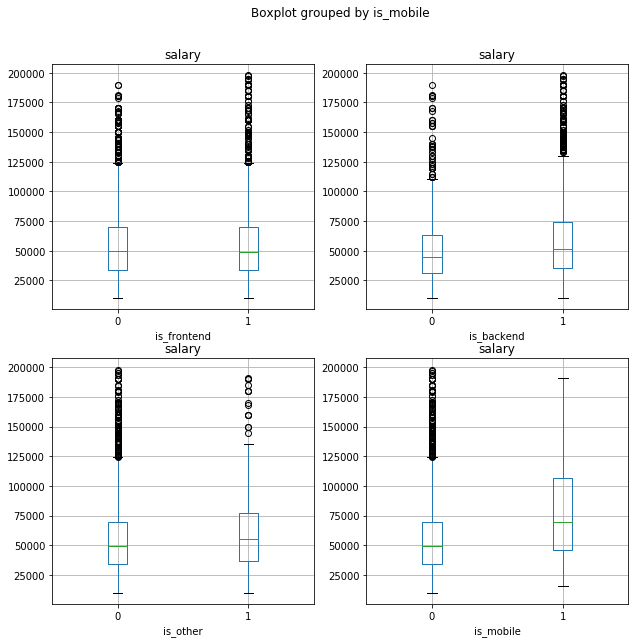

In [91]:
import matplotlib.pyplot as plt
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
df_low.boxplot('salary', 'is_frontend', ax=ax1);
df_low.boxplot('salary', 'is_backend', ax=ax2);
df_low.boxplot('salary', 'is_other', ax=ax3);
df_low.boxplot('salary', 'is_mobile', ax=ax4);

In [95]:
fw_counts = pd.Series(fw_count).sort_values(ascending=True)
fw_counts = fw_counts[fw_counts > 20]
fw_counts

Torch          21
Vue.js         21
Laravel        36
TensorFlow     78
Hadoop         79
Drupal         90
Spark         103
Cordova       137
Django        237
WordPress     340
Spring        434
.NET Core     495
React.js      589
Angular       659
Node.js       881
dtype: int64

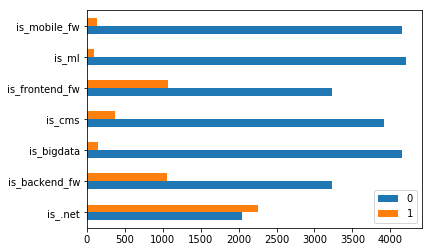

In [96]:
d = {}
for key, tech in {
        'frontend_fw': ('Angular', 'React.js', 'Vue.js'),
        'backend_fw': ('Node.js', 'Django', 'Laravel'),
        'mobile_fw': ('Cordova',),
        '.net': ('.NET Core'),
        'cms': ('WordPress', 'Drupal'),
        'bigdata': ('Spark', 'Hadoop'),
        'ml': ('TensorFlow', 'Torch',),
    }.items():
    d['is_{}'.format(key)] = df['Frameworks, herramientas y librerías'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['Frameworks, herramientas y librerías'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
pd.DataFrame({x: v.value_counts() for x, v in d.items()}).T.plot.barh();

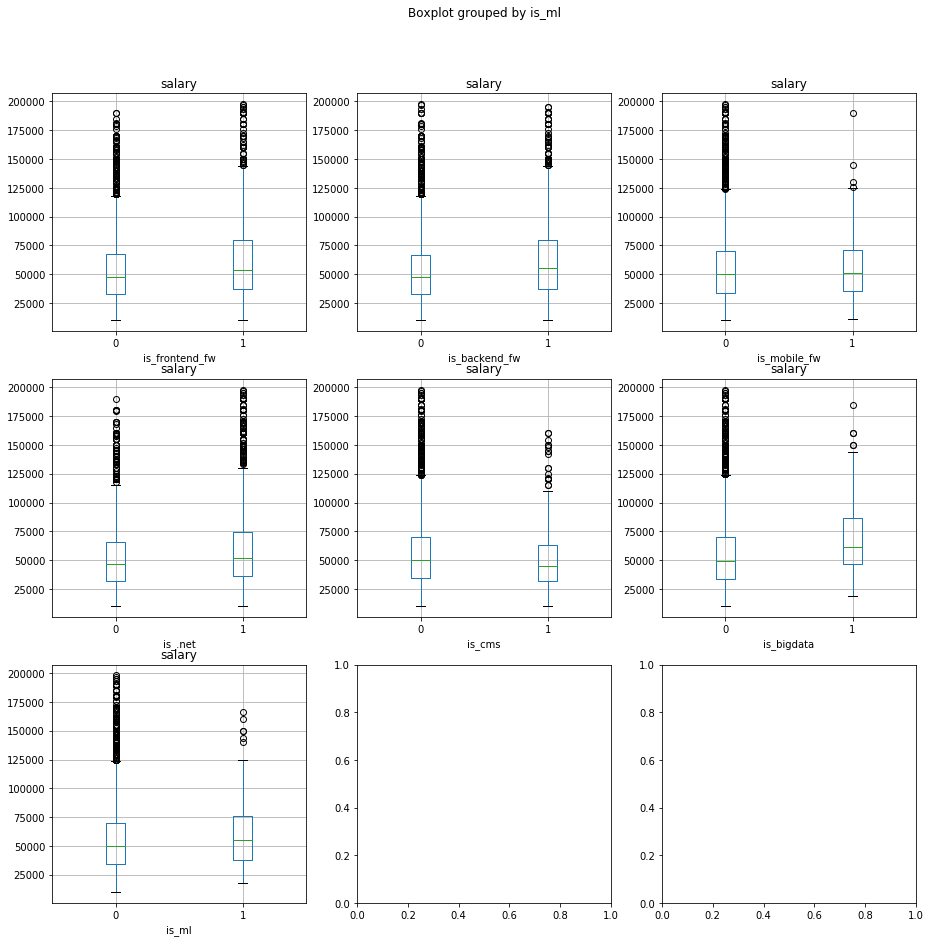

In [98]:
import matplotlib.pyplot as plt
_, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, _, _)) = plt.subplots(3, 3, figsize=(15, 15))
df_low = df[df['Salario mensual BRUTO (en tu moneda local)'] < 200000]
df_low.boxplot('salary', 'is_frontend_fw', ax=ax1);
df_low.boxplot('salary', 'is_backend_fw', ax=ax2);
df_low.boxplot('salary', 'is_mobile_fw', ax=ax3);
df_low.boxplot('salary', 'is_.net', ax=ax4);
df_low.boxplot('salary', 'is_cms', ax=ax5);
df_low.boxplot('salary', 'is_bigdata', ax=ax6);
df_low.boxplot('salary', 'is_ml', ax=ax7);

In [101]:
db_counts = pd.Series(db_count).sort_values(ascending=True)
db_counts = db_counts[db_counts > 20]
db_counts

Teradata                     21
Neo4j                        31
Apache HBase                 51
Informix                     60
Apache Hive                  73
Amazon Redshift              86
Google Cloud Storage        108
IBM Db2                     128
Cassandra                   165
Amazon RDS/Aurora           181
Amazon DynamoDB             194
Microsoft Azure (Tables     232
CosmosDB                    232
etc)                        232
SQL                         232
Redis                       361
SQLite                      369
ElasticSearch               375
MariaDB                     536
MongoDB                     634
Oracle                      643
PostgreSQL                  851
MSSQL                      1159
MySQL                      1626
dtype: int64

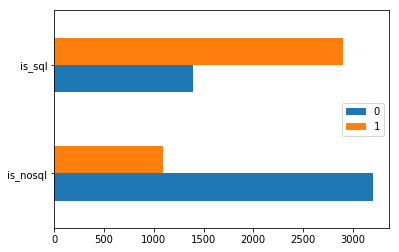

In [103]:
d = {}
for key, tech in {
        'sql': ('MySQL', 'MSSQL', 'PostgreSQL', 'Oracle', 'MariaDB', 'Microsoft Azure', 'IBM Db2'),
        'nosql': ('MongoDB', 'ElasticSearch', 'Redis', 'Amazon DynamoDB', 'Cassandra', 'Google Cloud Storage'),
    }.items():
    d['is_{}'.format(key)] = df['Bases de datos'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['Bases de datos'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
pd.DataFrame({x: v.value_counts() for x, v in d.items()}).T.plot.barh();

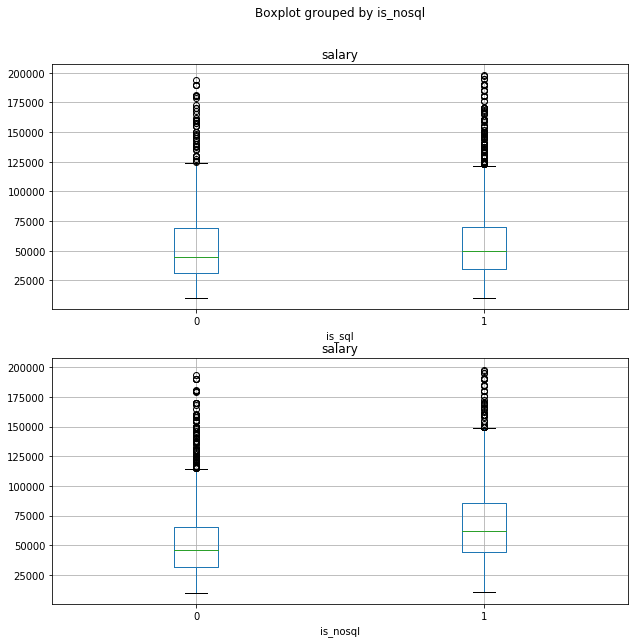

In [106]:
import matplotlib.pyplot as plt
_, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(10, 10))
df_low = df[df['Salario mensual BRUTO (en tu moneda local)'] < 200000]
df_low.boxplot('salary', 'is_sql', ax=ax1);
df_low.boxplot('salary', 'is_nosql', ax=ax2);

In [109]:
qat_counts = pd.Series(qat_count).sort_values(ascending=True)
qat_counts = qat_counts[qat_counts > 20]
qat_counts

OpenQA                     27
HP LoadRunner              32
Test Complete              42
RSpec                      54
Visual Studio Coded UI    114
Selenium                  398
dtype: int64

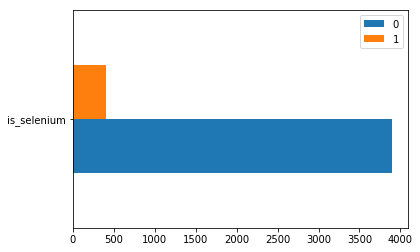

In [110]:
d = {}
for key, tech in {
        'selenium': ('Selenium',),
    }.items():
    d['is_{}'.format(key)] = df['QA / Testing'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['QA / Testing'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
pd.DataFrame({x: v.value_counts() for x, v in d.items()}).T.plot.barh();

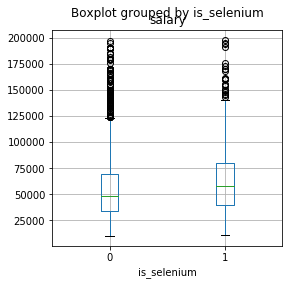

In [112]:
import matplotlib.pyplot as plt
_, ((ax1)) = plt.subplots(1, 1, figsize=(4, 4))
df_low = df[df['Salario mensual BRUTO (en tu moneda local)'] < 200000]
df_low.boxplot('salary', 'is_selenium', ax=ax1);

In [116]:
ide_counts = pd.Series(ide_count).sort_values(ascending=True)
ide_counts = ide_counts[ide_counts > 200]
ide_counts

PyCharm            204
Vi                 335
Android Studio     347
Atom               350
Eclipse            581
IntelliJ           592
Vim                606
Notepad++          753
Sublime Text       825
Visual Studio     1250
dtype: int64

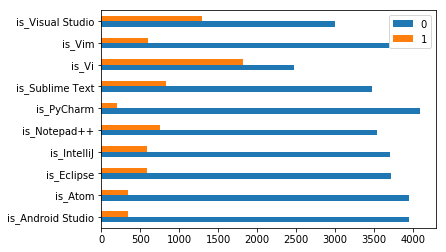

In [118]:
d = {}
for ide in ide_counts.index.tolist():
    key, tech = ide, (ide,)
    d['is_{}'.format(key)] = df['IDEs'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['IDEs'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
pd.DataFrame({x: v.value_counts() for x, v in d.items()}).T.plot.barh();

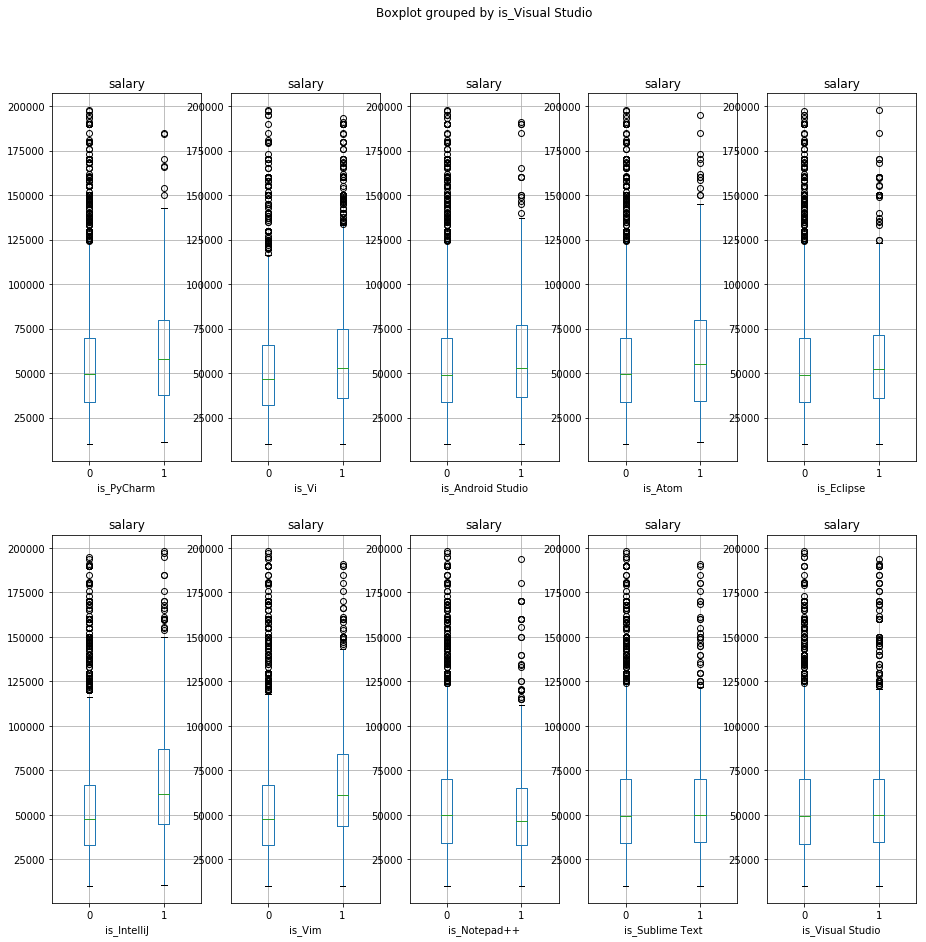

In [121]:
import matplotlib.pyplot as plt
_, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(15, 15))
df_low = df[df['Salario mensual BRUTO (en tu moneda local)'] < 200000]

df_low.boxplot('salary', 'is_PyCharm', ax=ax1);
df_low.boxplot('salary', 'is_Vi', ax=ax2);
df_low.boxplot('salary', 'is_Android Studio', ax=ax3);
df_low.boxplot('salary', 'is_Atom', ax=ax4);
df_low.boxplot('salary', 'is_Eclipse', ax=ax5);
df_low.boxplot('salary', 'is_IntelliJ', ax=ax6);
df_low.boxplot('salary', 'is_Vim', ax=ax7);
df_low.boxplot('salary', 'is_Notepad++', ax=ax8);
df_low.boxplot('salary', 'is_Sublime Text', ax=ax9);
df_low.boxplot('salary', 'is_Visual Studio', ax=ax10);

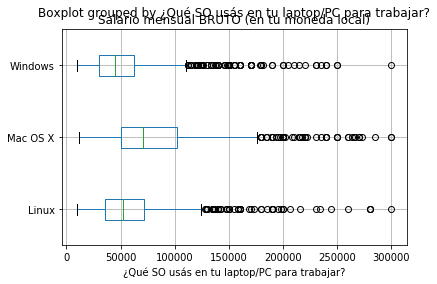

In [123]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', '¿Qué SO usás en tu laptop/PC para trabajar?', vert=False);

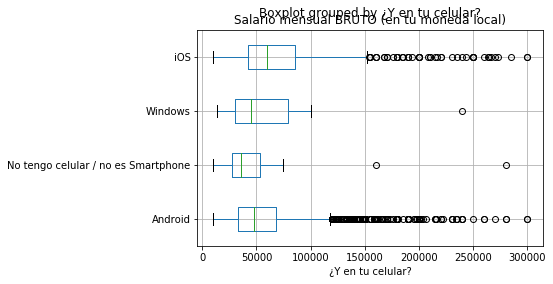

In [124]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', '¿Y en tu celular?', vert=False);

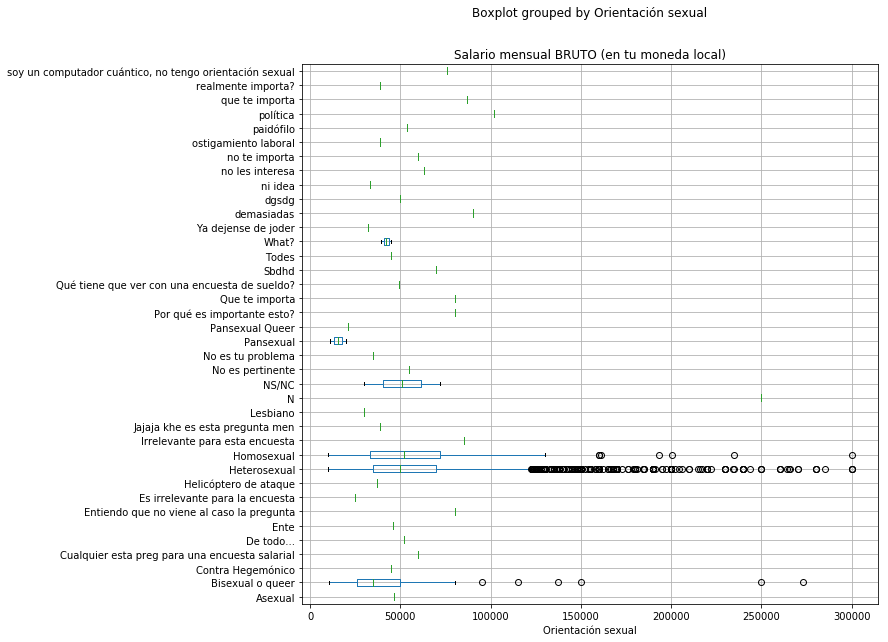

In [127]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', 'Orientación sexual', vert=False, figsize=(10, 10));

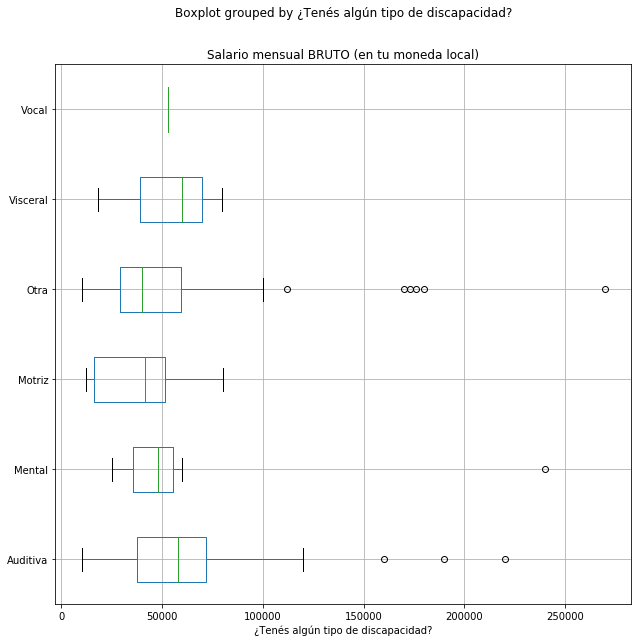

In [132]:
df.boxplot('Salario mensual BRUTO (en tu moneda local)', '¿Tenés algún tipo de discapacidad?', vert=False, figsize=(10, 10));